# Section 04: Case Study: Joins on Stack Overflow Data
### `01- Left joining questions and tags`
- Join together `questions` and `question_tags` using the `id` and `question_id` columns, respectively.
- Use another join to add in the `tags` table.
- Use `replace_na` to change the `NAs` in the `tag_name` column to `"only-r"`.

Note that we'll be using `left_joins` in this exercise to ensure we keep all questions, even those without a corresponding tag. However, since we know the `questions` data is all R data, we'll want to manually tag these as R questions with `replace_na`.

In [4]:
library(tidyverse)
library(dplyr)
library(tidyr)

In [5]:
tags <- read.csv("..\\00_Datasets\\tags.csv", header=TRUE)
questions <- read.csv("..\\00_Datasets\\questions.csv", header=TRUE)
question_tags <- read.csv("..\\00_Datasets\\question_tags.csv", header=TRUE)
answers <- read.csv("..\\00_Datasets\\answers.csv", header=TRUE)

In [6]:
# Replace the NAs in the tag_name column
questions_with_tags <- questions %>%
  left_join(question_tags, by = c("id" = "question_id")) %>%
  left_join(tags, by = c("tag_id" = "id")) %>%
  replace_na(list(tag_name = "only-r"))

head(questions_with_tags)

,id,creation_date,score,tag_id,tag_name
,<int>,<chr>,<int>,<int>,<chr>
1,22557677,3/21/2014,1,18,regex
2,22557677,3/21/2014,1,139,string
3,22557677,3/21/2014,1,16088,time-complexity
4,22557677,3/21/2014,1,1672,backreference
5,22557677,3/21/2014,1,18,regex
6,22557677,3/21/2014,1,139,string


### `02-Comparing scores across tags`
- Aggregate by the `tag_name`.
- Summarize to get the mean score for each question, `score`, as well as the total number of questions, `num_questions`.
- Arrange `num_questions` in descending order to sort the answers by the most asked questions.

In [7]:
questions_with_tags %>% 
  # Group by tag_name
  group_by(tag_name) %>%
  # Get mean score and num_questions
  summarize(score = mean(score),
        	num_questions = n()) %>%
  # Sort num_questions in descending order
  arrange(desc(num_questions))

tag_name,score,num_questions
<chr>,<dbl>,<int>
only-r,1.1727395,64166
ggplot2,2.3311985,42627
dataframe,2.2220842,28183
dplyr,1.6645284,23227
shiny,1.2840644,22685
plot,2.1490154,15844
data.table,2.5548955,12961
matrix,1.5877412,8810
loops,0.7105331,7728


### `03-What tags never appear on R questions?`
- Use a join to determine which tags never appear on an R question.

In [8]:
# Using a join, filter for tags that are never on an R question
tags %>%
  anti_join(question_tags, by = c("id" = "tag_id"))

id,tag_name
<int>,<chr>
124399,laravel-dusk
124402,spring-cloud-vault-config
124404,spring-vault
124405,apache-bahir
124407,astc
124408,simulacrum
124410,angulartics2
124411,django-rest-viewsets
124414,react-native-lightbox


### `04-Finding gaps between questions and answers`
- Use an inner join to combine the `questions` and `answers` tables using the suffixes `"_question"` and `"_answer"`, respectively.
- Subtract `creation_date_question` from `creation_date_answer` within the `as.integer()` function to create the `gap` column.

In [9]:
dt_conv <- function(x) {
    as.Date(x, format = "%m/%d/%Y")
}

questions <- questions %>%
mutate(creation_date = dt_conv(creation_date))

answers <- answers %>%
mutate(creation_date = dt_conv(creation_date))

In [10]:
questions %>%
  # Inner join questions and answers with proper suffixes
  inner_join(answers, by = c("id" = "question_id"), 
             suffix = c("_question", "_answer")) %>%
  # Subtract creation_date_question from creation_date_answer to create gap
  mutate(gap = as.integer(creation_date_question - creation_date_answer))

id,creation_date_question,score_question,id_answer,creation_date_answer,score_answer,gap
<int>,<date>,<int>,<int>,<date>,<int>,<int>
22557677,2014-03-21,1,22560670,2014-03-21,2,0
22557707,2014-03-21,2,22558516,2014-03-21,1,0
22557707,2014-03-21,2,22558726,2014-03-21,4,0
22558084,2014-03-21,2,22558085,2014-03-21,0,0
22558084,2014-03-21,2,22606545,2014-03-24,1,-3
22558084,2014-03-21,2,22610396,2014-03-24,5,-3
22558084,2014-03-21,2,34374729,2015-12-19,0,-638
22558395,2014-03-21,2,22559327,2014-03-21,1,0
22558395,2014-03-21,2,22560102,2014-03-21,2,0


### `05-Joining question and answer counts`
- Count and sort the `question_id` column in the `answers` table to create the `answer_counts` table.
- Join the `questions` table with the `answer_counts` table and include all observations from the `questions` table.
- Replace the NA values in the `n` column with 0s.

In [11]:
# Count and sort the question id column in the answers table
answer_counts <- answers %>%
  count(question_id, sort = TRUE)
  

# Combine the answer_counts and questions tables
questions %>%
  left_join(answer_counts, by = c("id" = "question_id")) %>%
  # Replace the NAs in the n column
  replace_na(list(n = 0))

id,creation_date,score,n
<int>,<date>,<int>,<int>
22557677,2014-03-21,1,1
22557707,2014-03-21,2,2
22558084,2014-03-21,2,4
22558395,2014-03-21,2,3
22558613,2014-03-21,0,1
22558677,2014-03-21,2,2
22558887,2014-03-21,8,1
22559180,2014-03-21,1,1
22559312,2014-03-21,0,1


### `06-Joining questions, answers, and tags`
- Combine the `question_tags` table with `question_answer_counts` using an `inner_join`.
- Now, use another `inner_join` to add the `tags` table.

In [12]:
answer_counts <- answers %>%
    count(question_id, sort = TRUE)

question_answer_counts <- questions %>%
    left_join(answer_counts, by = c("id" = "question_id")) %>%
    replace_na(list(n = 0))

In [16]:
question_answer_counts %>%
  # Join the question_tags tables
  inner_join(question_tags, by = c("id" = "question_id")) %>%
  # Join the tags table
  inner_join(tags, by = c("tag_id" = "id"))

id,creation_date,score,n,tag_id,tag_name
<int>,<date>,<int>,<int>,<int>,<chr>
22557677,2014-03-21,1,1,18,regex
22557677,2014-03-21,1,1,139,string
22557677,2014-03-21,1,1,16088,time-complexity
22557677,2014-03-21,1,1,1672,backreference
22557677,2014-03-21,1,1,18,regex
22557677,2014-03-21,1,1,139,string
22557677,2014-03-21,1,1,6088,hosts
22557677,2014-03-21,1,1,1672,backreference
22558084,2014-03-21,2,4,6419,time-series


### `07-Average answers by question`
- Aggregate the `tagged_answers` table by `tag_name`.
- Summarize `tagged_answers` to get the count of `questions` and the `average_answers`.
- Sort the resulting `questions` column in descending order.

In [17]:
tagged_answers <- question_answer_counts %>%
    inner_join(question_tags, by = c("id" = "question_id")) %>%
    inner_join(tags, by = c("tag_id" = "id"))

In [18]:
tagged_answers %>%
  # Aggregate by tag_name
  group_by(tag_name)  %>%
  # Summarize questions and average_answers
  summarize(questions = n(),
            average_answers = mean(n)) %>%
  # Sort the questions in descending order
  arrange(desc(questions))

tag_name,questions,average_answers
<chr>,<int>,<dbl>
ggplot2,42627,1.291646
dataframe,28183,1.879395
dplyr,23227,1.874112
shiny,22685,1.073000
plot,15844,1.322267
data.table,12961,1.645629
matrix,8810,1.549489
loops,7728,1.553830
regex,7269,2.149677


### `08-Joining questions and answers with tags`
- Use two inner joins to combine the `question_tags` and `tags` tables with the `questions` table.
- Now, use two inner joins to combine the `question_tags` and `tags` tables with the `answers` table.

In [19]:
# Inner join the question_tags and tags tables with the questions table
questions %>%
  inner_join(question_tags, by = c("id" = "question_id")) %>%
  inner_join(tags, by = c("tag_id" = "id"))

# Inner join the question_tags and tags tables with the answers table
answers %>%
  inner_join(question_tags, by = c("question_id" = "question_id")) %>%
  inner_join(tags, by = c("tag_id" = "id"))

id,creation_date,score,tag_id,tag_name
<int>,<date>,<int>,<int>,<chr>
22557677,2014-03-21,1,18,regex
22557677,2014-03-21,1,139,string
22557677,2014-03-21,1,16088,time-complexity
22557677,2014-03-21,1,1672,backreference
22557677,2014-03-21,1,18,regex
22557677,2014-03-21,1,139,string
22557677,2014-03-21,1,6088,hosts
22557677,2014-03-21,1,1672,backreference
22558084,2014-03-21,2,6419,time-series


id,creation_date,question_id,score,tag_id,tag_name
<int>,<date>,<int>,<int>,<int>,<chr>
39143935,2016-08-25,39142481,0,4240,average
39143935,2016-08-25,39142481,0,5571,summary
39144014,2016-08-25,39024390,0,85748,shiny
39144014,2016-08-25,39024390,0,83308,r-markdown
39144014,2016-08-25,39024390,0,116736,htmlwidgets
39144252,2016-08-25,39096741,6,67746,rstudio
39144375,2016-08-25,39143885,5,105113,data.table
39144430,2016-08-25,39144077,0,276,variables
39144625,2016-08-25,39142728,1,46457,dataframe


### `09-Binding and counting posts with tags`
- Combine the `questions_with_tags` and `answers_with_tags` tables into `posts_with_tags`.
- Add a `year` column to the `posts_with_tags` table, then count posts by `type`, `year`, and `tag_name`.

In [22]:
library(lubridate)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [23]:
questions_with_tags <- questions %>%
  inner_join(question_tags, by = c("id" = "question_id")) %>%
  inner_join(tags, by = c("tag_id" = "id"))

In [24]:
answers_with_tags <- answers %>%
  inner_join(question_tags, by = "question_id") %>%
  inner_join(tags, by = c("tag_id" = "id"))

In [25]:
# Combine the two tables into posts_with_tags
posts_with_tags <- bind_rows(questions_with_tags %>% 
mutate(type = "question"),answers_with_tags %>% 
mutate(type = "answer"))

# Add a year column, then count by type, year, and tag_name
posts_with_tags %>%
  mutate(year = year(creation_date)) %>%
  count(type, year, tag_name)

type,year,tag_name,n
<chr>,<dbl>,<chr>,<int>
answer,2008,bayesian,1
answer,2008,dataframe,3
answer,2008,dirichlet,1
answer,2008,eof,1
answer,2008,file,1
answer,2008,file-io,1
answer,2008,function,6
answer,2008,global-variables,6
answer,2008,math,2


### `10-Visualizing questions and answers in tags`

- Filter the `by_type_year_tag` table for the dplyr and ggplot2 tags.
- Create a line plot with that filtered table that plots the frequency (`n`) over time, colored by question/answer and faceted by tag.

In [26]:
by_type_year_tag <- posts_with_tags %>%
  mutate(year = year(creation_date)) %>%
  count(type, year, tag_name)

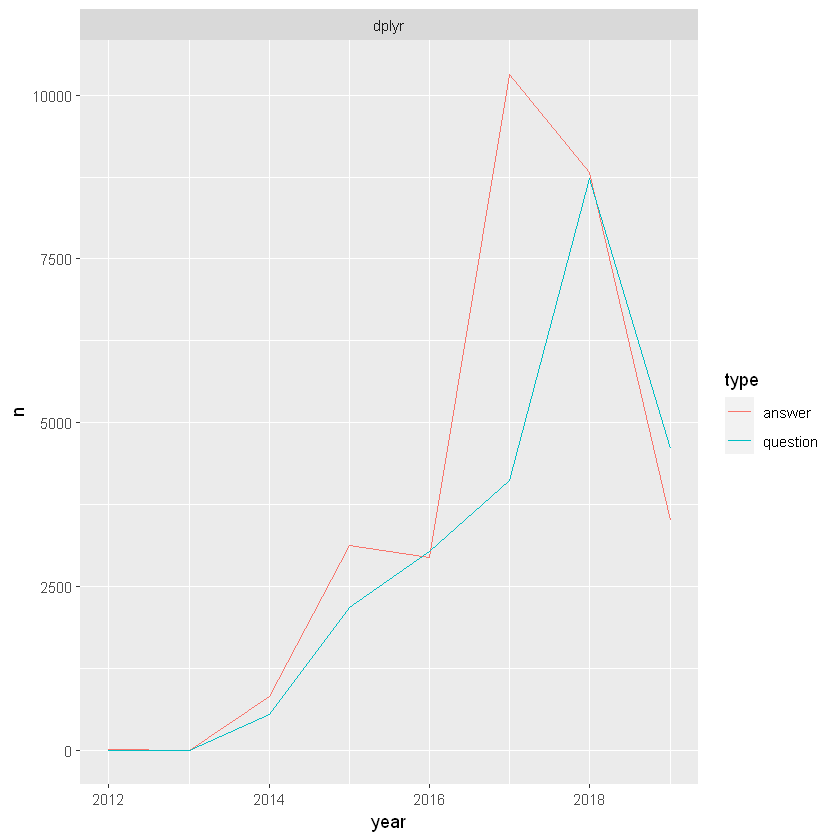

In [30]:
# Filter for the dplyr and ggplot2 tag names 
by_type_year_tag_filtered <- by_type_year_tag %>%
  filter(tag_name == "dplyr")

# Create a line plot faceted by the tag name 
ggplot(by_type_year_tag_filtered, aes(year, n, color = type)) +
  geom_line() +
  facet_wrap(~ tag_name)

### `The End` 